# Working with FB Prophet
## begin with [Forecasting Growth](https://facebookincubator.github.io/prophet/docs/forecasting_growth.html) example from FB page  

Lok at time series of daily page views for the Wikipedia page of the R programming language. The csv is available [here](https://github.com/facebookincubator/prophet/blob/master/examples/example_wp_R.csv)

In [1]:
wp_R_dataset_url = 'https://github.com/facebookincubator/prophet/blob/master/examples/example_wp_R.csv'
wp_R_filename = '../datasets/example_wp_R.csv'

In [2]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

In [10]:
# NB: this didn't work as of 8/22/17
#import io
#import requests
#s=requests.get(peyton_dataset_url).content
#df=pd.read_csv(io.StringIO(s.decode('utf-8')))#df = pd.read_csv(peyton_dataset_url)

### import the data and transform to log-scale

In [3]:
df = pd.read_csv(wp_R_filename)
# transform to log scale
df['y']=np.log(df['y'])
df.head()

,ds,y
0,2008-01-30,5.976351
1,2008-01-16,6.049733
2,2008-01-17,6.011267
3,2008-01-14,5.953243
4,2008-01-15,5.910797


By default, Prophet uses a linear model for its forecast. When forecasting growth, there is usually some maximum achievable point: total market size, total population size, etc. This is called the carrying capacity, and the forecast should saturate at this point.

Prophet allows you to make forecasts using a [logistic growth](https://en.wikipedia.org/wiki/Logistic_function) trend model, with a specified carrying capacity. We illustrate this with the log number of page visits to the R (programming language) page on Wikipedia.

We must specify the carrying capacity in a column `cap`. Here we will assume a particular value, but this would usually be set using data or expertise about the market size.

In [4]:
df['cap']=8.5

In [6]:
df.tail()

,ds,y,cap
2858,2015-12-11,7.834788,8.5
2859,2015-12-12,7.360104,8.5
2860,2015-12-13,7.479864,8.5
2861,2015-12-18,7.765145,8.5
2862,2015-12-19,7.220374,8.5


The important things to note are that `cap` must be specified for every row in the dataframe, and that it does not have to be constant. If the market size is growing, then `cap` can be an increasing sequence.


We then fit the model as before, except pass in an additional argument to specify logistic growth:

In [5]:
m = Prophet(growth='logistic')
m.fit(df)

We make a dataframe for future predictions as before, except we must also specify the capacity in the future. Here we keep capacity constant at the same value as in the history, and forecast 3 years into the future.

In [7]:
future = m.make_future_dataframe(periods=3*365+1) # covers leap year of 2016 this way

In [9]:
%matplotlib inline

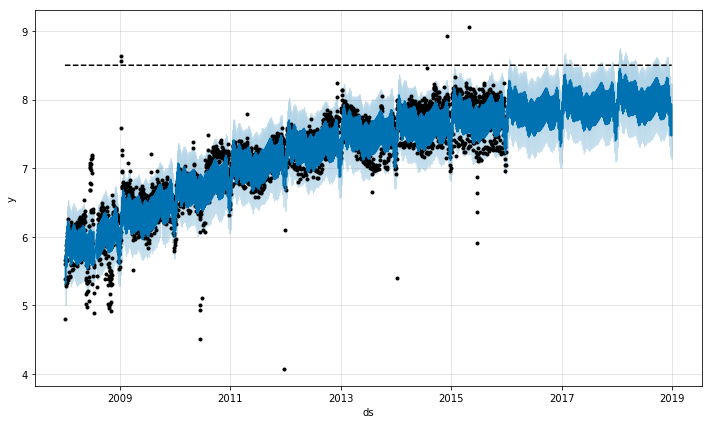

In [10]:
future['cap'] = 8.5
fcst = m.predict(future)
m.plot(fcst);

In [11]:
m.plot?

### go back and make a prediction using simple linear growth model

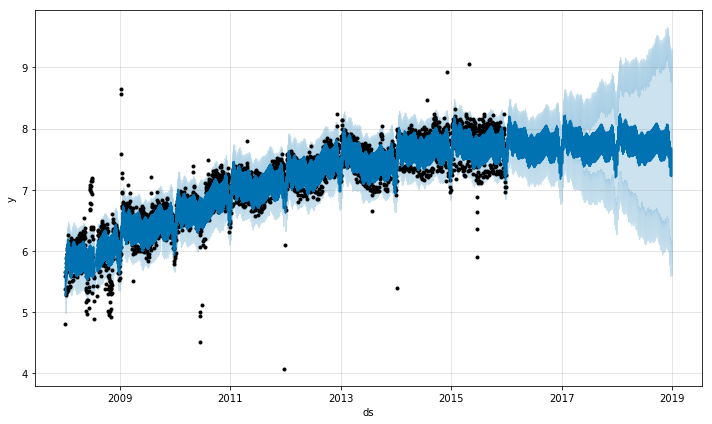

In [13]:
m_linear = Prophet()
m_linear.fit(df);
future_lin = m_linear.make_future_dataframe(periods=3*365+1) # covers leap year of 2016 this way
fcst_lin = m_linear.predict(future_lin)
m_linear.plot(fcst_lin);

## poke around a little more at what is under the hood of FB prophet